In [85]:
import pandas as pd

In [86]:
df=pd.read_csv("customer_churn_data.csv")

In [87]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [89]:
df.isna().sum().sum()

np.int64(297)

In [90]:
df["InternetService"]=df["InternetService"].fillna("")

In [91]:
df.isna().sum().sum()

np.int64(0)

In [92]:
df.duplicated().sum()

np.int64(0)

In [93]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [94]:
numeric_col_data=df.select_dtypes(include=["number"])

In [95]:
numeric_col_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [96]:
import matplotlib.pyplot as plt

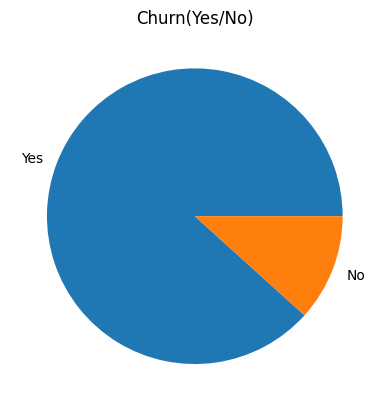

In [97]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn(Yes/No)")
plt.ylabel("")
plt.show()

In [98]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [99]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [100]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [101]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

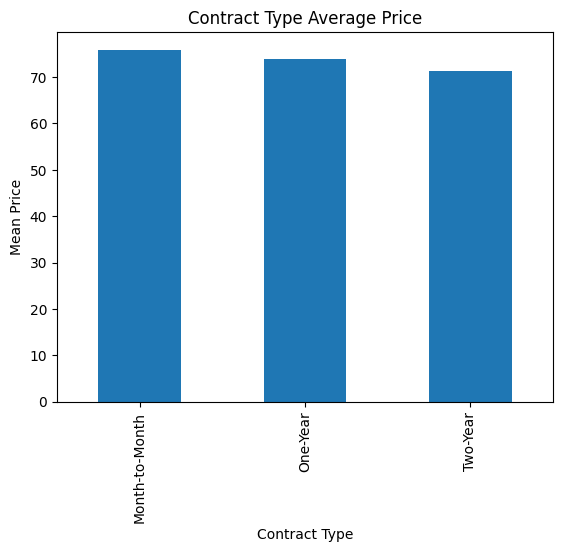

In [102]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Contract Type Average Price")
plt.show()

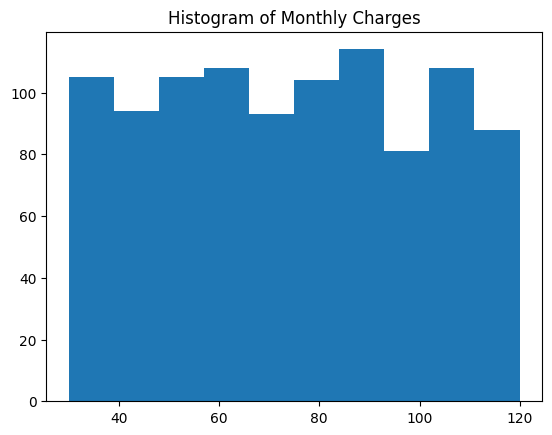

In [103]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")
plt.show()

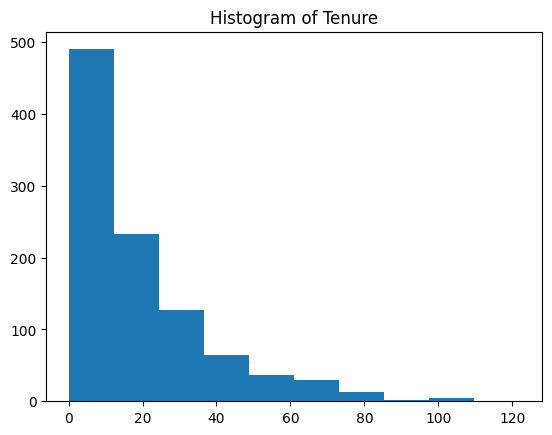

In [104]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

In [105]:
y= df[["Churn"]]
X= df[["Age","Gender","Tenure","MonthlyCharges"]]

In [106]:
X["Gender"]= X["Gender"].apply(lambda x: 1 if x== "Female" else 0)

In [107]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [108]:
type(X["Gender"][0])

numpy.int64

In [109]:
y["Churn"]=y["Churn"].apply(lambda x: 1 if x== "Yes" else 0)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [111]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
Sclaer = StandardScaler()

In [114]:
X_train= Sclaer.fit_transform(X_train)

In [115]:
import joblib
joblib.dump(Sclaer,"Scaler.pkl")

['Scaler.pkl']

In [116]:
X_test= Sclaer.fit_transform(X_test)

In [117]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy score on model is",format(accuracy_score(y_test, predictions)))

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
log_model=LogisticRegression()

In [121]:
import warnings
warnings.filterwarnings("ignore")

In [122]:
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [123]:
y_pred=log_model.predict(X_test)

In [124]:
modelperformance(y_pred)

Accuracy score on model is 0.91


In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
param_grid={
    "n_neighbors":[3,5,7,9],
    "weights":["uniform","distance"]
}

In [127]:
gridkn= GridSearchCV(KNeighborsClassifier(),param_grid, cv=5)

In [128]:
gridkn.fit(X_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [129]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [130]:
y_pred = gridkn.predict(X_test)

In [131]:
modelperformance(y_pred)

Accuracy score on model is 0.91


In [132]:
from sklearn.svm import SVC

In [133]:
svm = SVC()

In [134]:
param_grid = {
    "C": [0.01,0.1,0.5,1],
    "kernel":["linear","rbf","poly"]
}

In [135]:
gridsvc=GridSearchCV(svm, param_grid,cv=5)

In [136]:
gridsvc.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [137]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [138]:
y_pred=gridsvc.predict(X_test)

In [139]:
modelperformance(y_pred)

Accuracy score on model is 0.91


In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
param_grid ={
    "criterion" : ["gini","entropy"],
    "splitter" : ["best","random"],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [142]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [143]:
grid_tree.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [144]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [145]:
y_pred = grid_tree.predict(X_test)

In [146]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [147]:
modelperformance(y_pred)

Accuracy score on model is 0.88


In [148]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [149]:
param_grid = {
    "n_estimators" : [32,64,128,256],
    "max_features" : [2,3,4],
    "bootstrap" : [True, False]
}

In [150]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)

In [151]:
grid_rfc.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [32, 64, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,128


In [152]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128}

In [153]:
y_pred=grid_rfc.predict(X_test)

In [154]:
modelperformance(y_pred)

Accuracy score on model is 0.86


In [155]:
best_model=gridsvc.best_estimator_

In [156]:
joblib.dump(best_model, "model.pkl")

['model.pkl']

In [157]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')